In [26]:
# Manipulation et analyse de données
import pandas as pd

# Visualisation graphique 
import matplotlib.pyplot as plt

import seaborn as sns

# Diviser les données en un ensemble d'entraînement et un ensemble de test
from sklearn.model_selection import train_test_split

# Modèle de régression linéaire
from sklearn.linear_model import LinearRegression

# Evaluer les performances du modèle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



## 1)  Collecte des données

In [4]:
netflix_data = pd.read_csv('data/netflix_titles.csv')

## 2) Exploration des données 

In [5]:
print(netflix_data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [6]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<font color='red'>On voit bien qu'il y a des valeurs manquantes (Null) sur quelques colonnes.</font>

### Gestion des valeurs manquantes: 

In [8]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
print(netflix_data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [9]:
# Remplacer les valeurs manquantes dans les colonne 'director','cast' et 'country' par 'non spécifiée'
netflix_data['director'].fillna(value='non spécifiée', inplace=True)
netflix_data['cast'].fillna(value='non spécifiée', inplace=True)
netflix_data['country'].fillna(value='non spécifiée', inplace=True)

In [10]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'duration' et 'rating'
netflix_data.dropna(subset=['duration', 'rating'], inplace=True)

In [11]:
# Remplacer les valeurs manquantes dans la colonne 'date_added' par la date la plus fréquente
most_frequent_date = netflix_data['date_added'].mode()[0]
netflix_data['date_added'].fillna(most_frequent_date, inplace=True)

In [12]:
# Vérifier à nouveau les valeurs manquantes
print(netflix_data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<font color='blue'>Toutes les colonnes sont maintenant conformes.</font>

### EDA : Exploratory Data Analysis

#### Variables numériques

 - Statistiques descriptives:

In [17]:
# Afficher les statistiques descriptives pour la colonne 'release_year'
print(netflix_data['release_year'].describe())

count    8800.000000
mean     2014.179886
std         8.822583
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


 - Visualisation graphique:

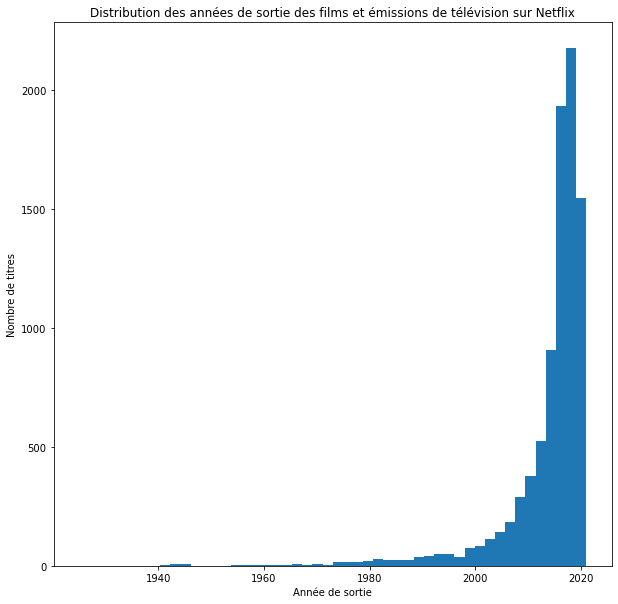

In [52]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.hist(netflix_data['release_year'], bins=50)
plt.title("Distribution des années de sortie des films et émissions de télévision sur Netflix")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.show()

 - Conclusions: 

- Il y a 8800 observations dans notre jeu de données.
- La moyenne de la colonne est 2014.18, ce qui indique que la plupart des films et émissions de télévision de Netflix ont été publiés au cours des dernières années.
- L'écart type est de 8.82, ce qui indique que la distribution des années de sortie est relativement concentrée autour de la moyenne.
- L'année la plus ancienne est 1925, tandis que l'année la plus récente est 2021.
- Les quartiles nous indiquent que 25% des films et émissions ont été publiés avant 2013, 50% entre 2013 et 2017, et 25% après 2019.

Ces informations peuvent être utiles pour mieux comprendre la distribution des années de sortie des films et émissions de télévision sur Netflix, et pour sélectionner les années d'intérêt lors de la création de notre modèle de prédiction de popularité.

#### Variables catégorielles

- Variable "type":

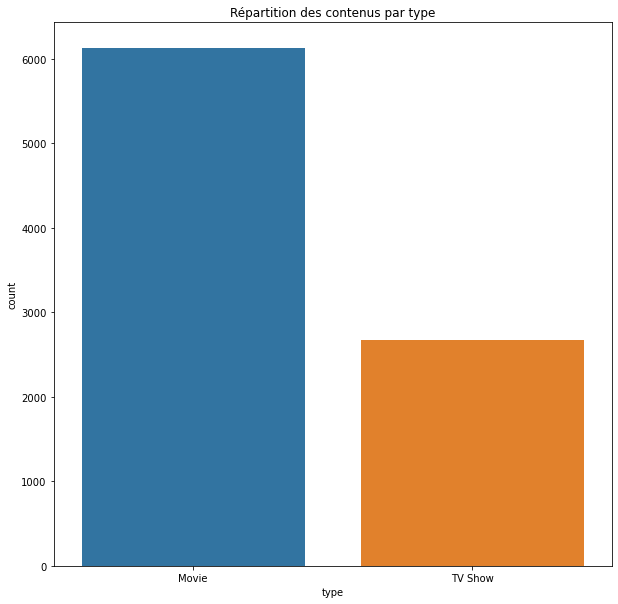

In [54]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x='type', data=netflix_data)
plt.title('Répartition des contenus par type')
plt.show()

On peut voir que la majorité des contenus sur Netflix sont des films, mais il y a également un grand nombre de séries.

- Variable "country":

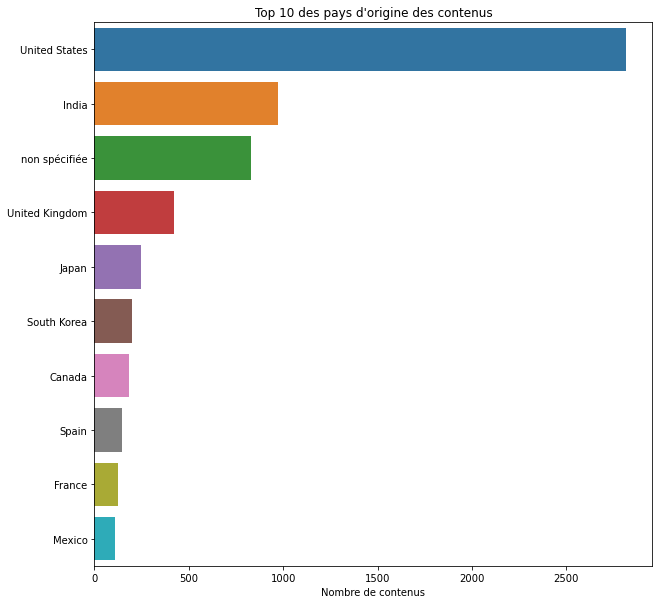

In [55]:
fig, ax = plt.subplots(figsize = (10, 10))
top_countries = netflix_data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 des pays d\'origine des contenus')
plt.xlabel('Nombre de contenus')
plt.show()

On peut voir que la grande majorité des contenus sur Netflix sont des productions américaines, suivies par les productions indiennes et britanniques.

- Variable "rating":

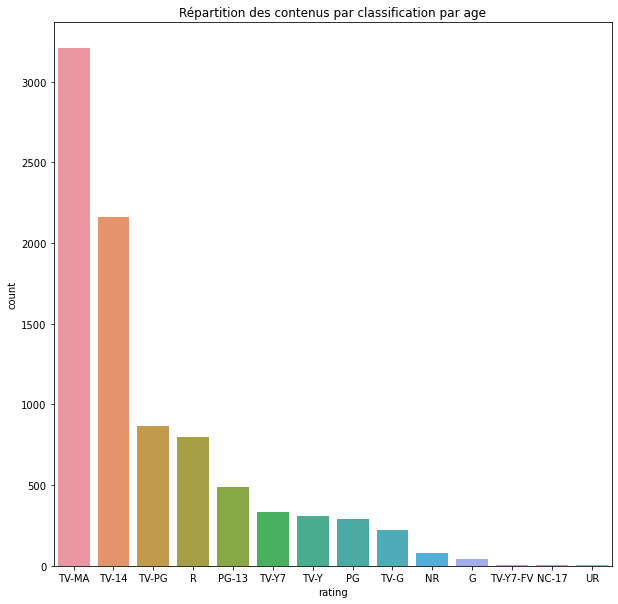

In [56]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index)
plt.title('Répartition des contenus par classification par age')
plt.show()

On peut constater que la majorité des contenus ont une classification "TV-MA" (pour adultes), suivie par "TV-14" (pour les adolescents).

- Variable "listed-in":

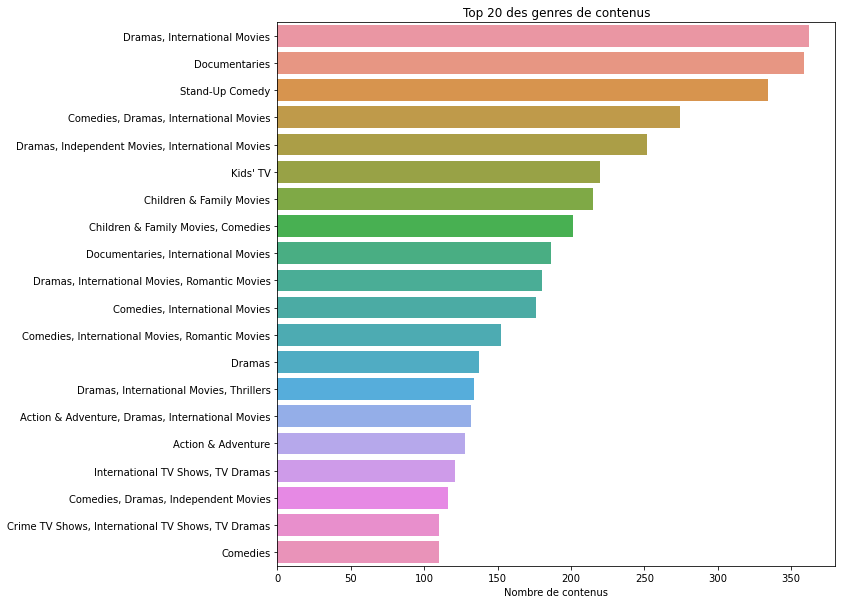

In [57]:
fig, ax = plt.subplots(figsize = (10, 10))
top_genres = netflix_data['listed_in'].value_counts().head(20)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 20 des genres de contenus')
plt.xlabel('Nombre de contenus')
plt.show()

On peut voir que les genres les plus populaires sont les drames, les comédies et les documentaires.

####  Corrélations entre les variables

In [91]:
# Création d'un sous-jeu de données contenant uniquement les colonnes catégorielles
cat_data = netflix_data.select_dtypes(include=['country'])

# Calcul de la matrice de corrélation des colonnes catégorielles
corr = cat_data.corr()

# Affichage de la heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

TypeError: data type 'country' not understood